In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('car.xlsx')

In [3]:
data=df["car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price"].str.split(",", expand=True)

In [4]:
columns_name=df.columns.str.split(',').tolist()
data=pd.DataFrame(data) 
data.head()
data.columns=columns_name
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8,115,5500,18,22,17450


In [5]:
change_to_numeric=['car_ID', 'symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [6]:
for i in change_to_numeric:
    data[i]=data[i].astype(float)

In [7]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,3.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2.0,3.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3.0,1.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4.0,2.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5.0,2.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201.0,-1.0,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,202.0,-1.0,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,203.0,-1.0,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,204.0,-1.0,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145.0,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [8]:
data["doornumber"] = data["doornumber"].replace({
    "zero": "0",
    "one": "1",
    "two": "2",
    "three": "3",
    "four": "4",
    "five": "5",
    "six": "6",
    "seven": "7",
    "eight": "8",
    "nine": "9",
    "ten": "10"
})

# Convert the column to integer data type
data["doornumber"] = data["doornumber"].astype(int)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (car_ID,)            205 non-null    float64
 1   (symboling,)         205 non-null    float64
 2   (CarName,)           205 non-null    object 
 3   (fueltype,)          205 non-null    object 
 4   (aspiration,)        205 non-null    object 
 5   (doornumber,)        205 non-null    int32  
 6   (carbody,)           205 non-null    object 
 7   (drivewheel,)        205 non-null    object 
 8   (enginelocation,)    205 non-null    object 
 9   (wheelbase,)         205 non-null    float64
 10  (carlength,)         205 non-null    float64
 11  (carwidth,)          205 non-null    float64
 12  (carheight,)         205 non-null    float64
 13  (curbweight,)        205 non-null    float64
 14  (enginetype,)        205 non-null    object 
 15  (cylindernumber,)    205 non-null    obj

In [10]:
data.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
data.to_csv("cardata.csv", index=False)

In [12]:
data=pd.read_csv('cardata.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,3.0,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2.0,3.0,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3.0,1.0,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4.0,2.0,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5.0,2.0,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [13]:
def process_in_columns(data_frame=None):
    data_frame.columns=data_frame.columns.str.strip()
    data_frame.columns = [col.lower() for col in data_frame.columns]
    return data_frame

In [14]:
process_in_columns(data_frame=data)

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,3.0,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,2.0,3.0,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,3.0,1.0,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,4.0,2.0,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,5.0,2.0,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201.0,-1.0,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,202.0,-1.0,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,203.0,-1.0,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,204.0,-1.0,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,145.0,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


<Axes: ylabel='fueltype,carname'>

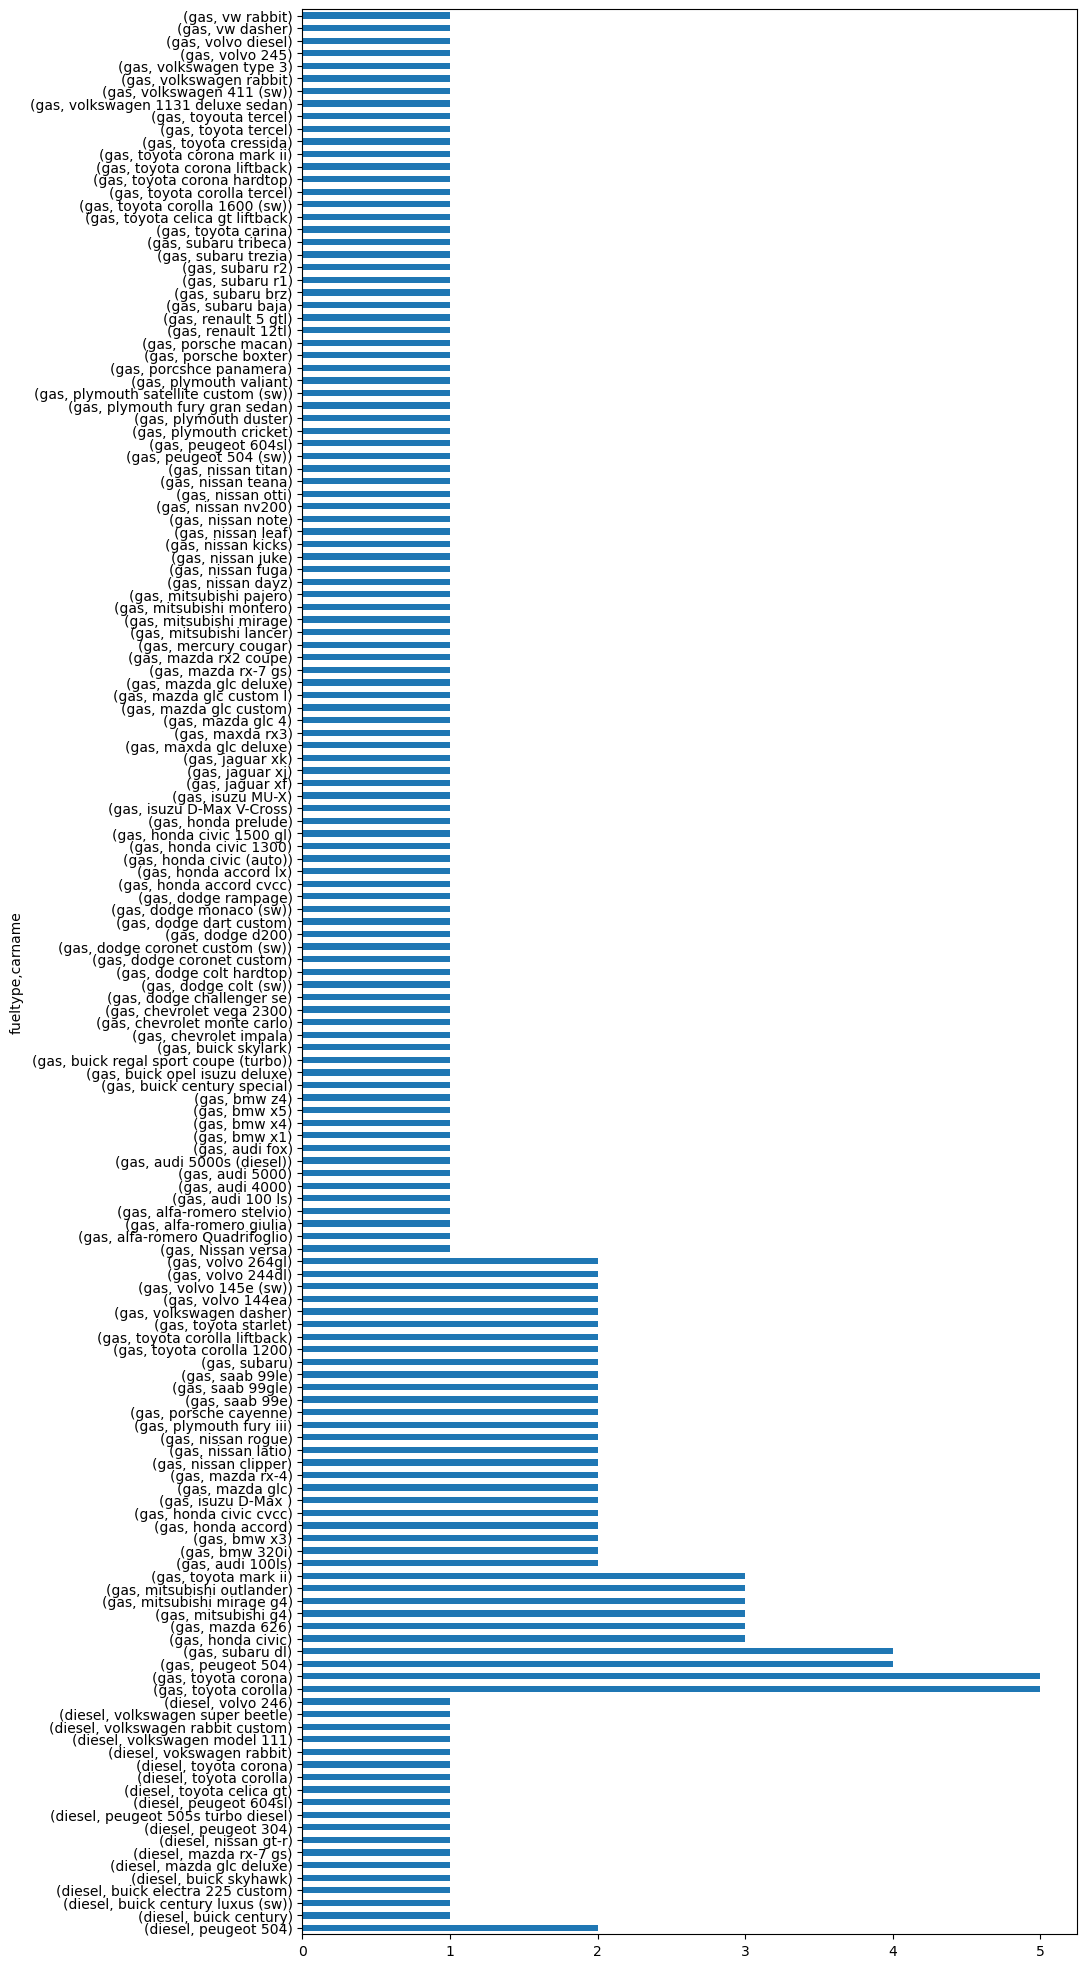

In [162]:
plt.figure(figsize=(10,25))
data.groupby(['fueltype'])['carname'].value_counts().plot.barh()

<Axes: ylabel='carname'>

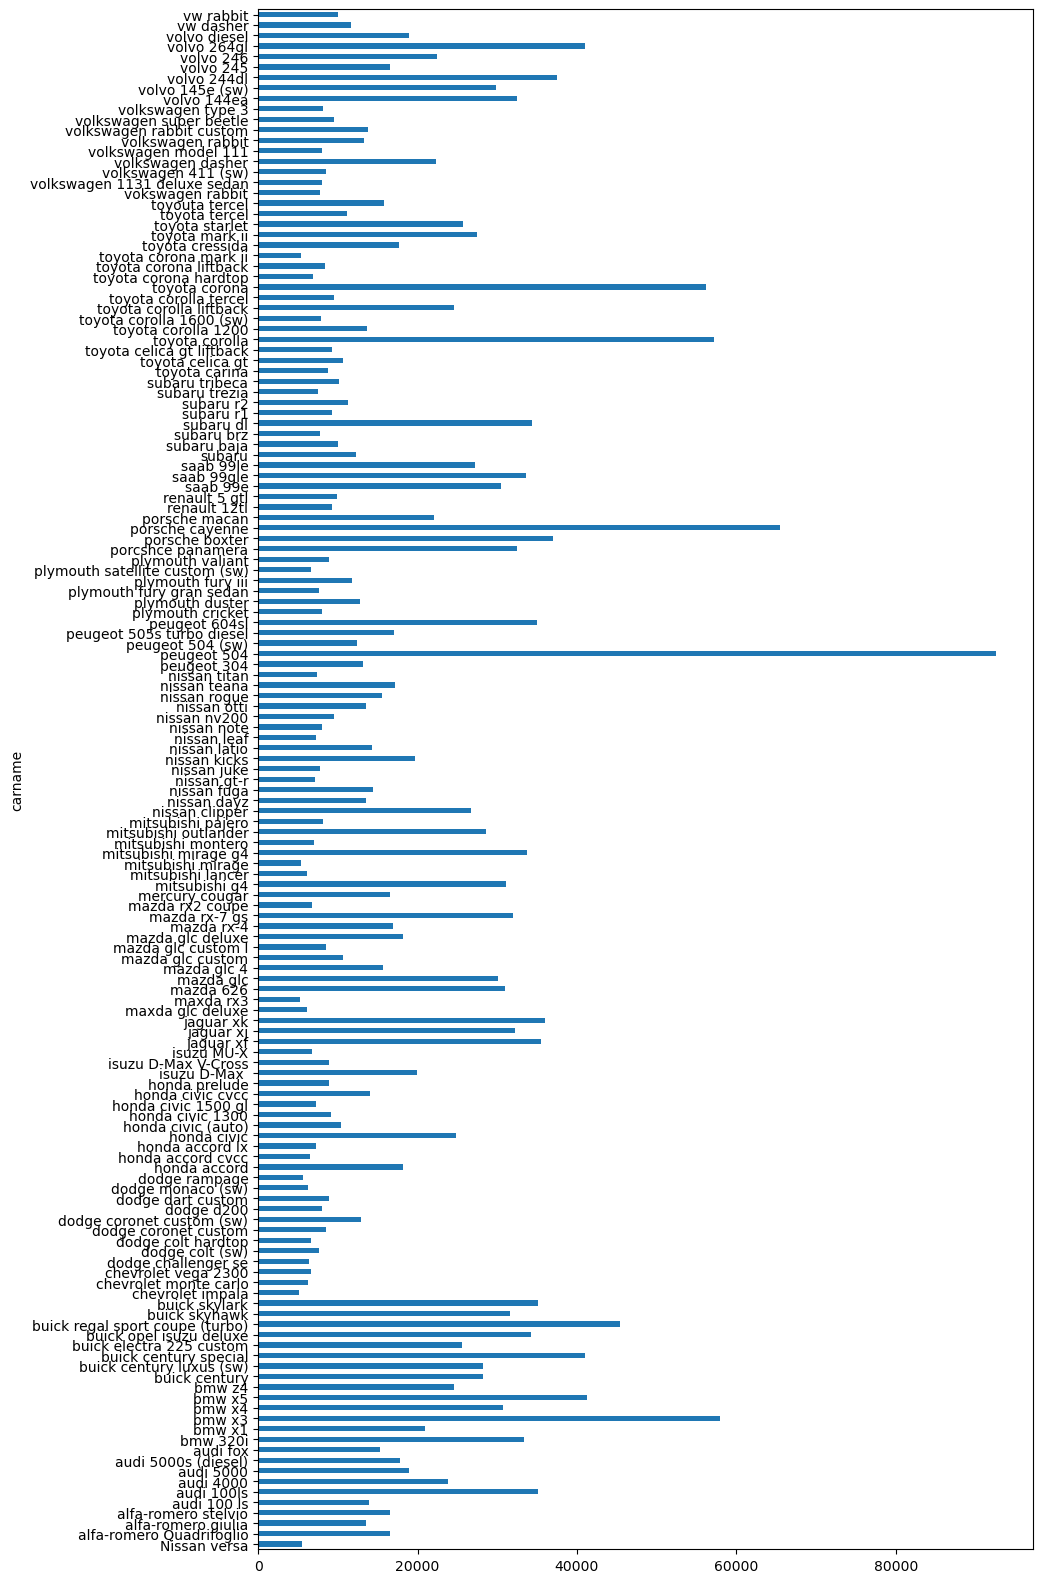

In [163]:
plt.figure(figsize=(10,20))
data.groupby(['carname'])['price'].sum().plot.barh()

<Axes: xlabel='price', ylabel='Density'>

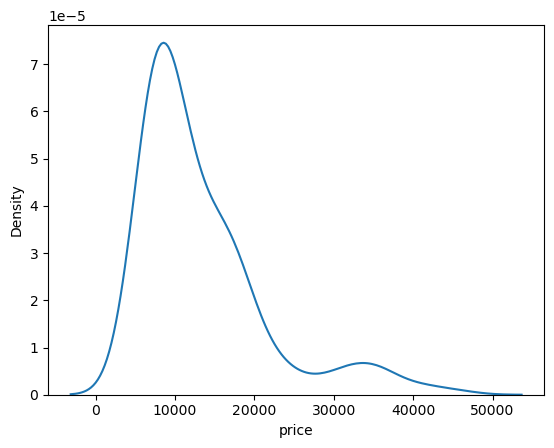

In [15]:
sns.kdeplot(data['price'])

<Axes: >

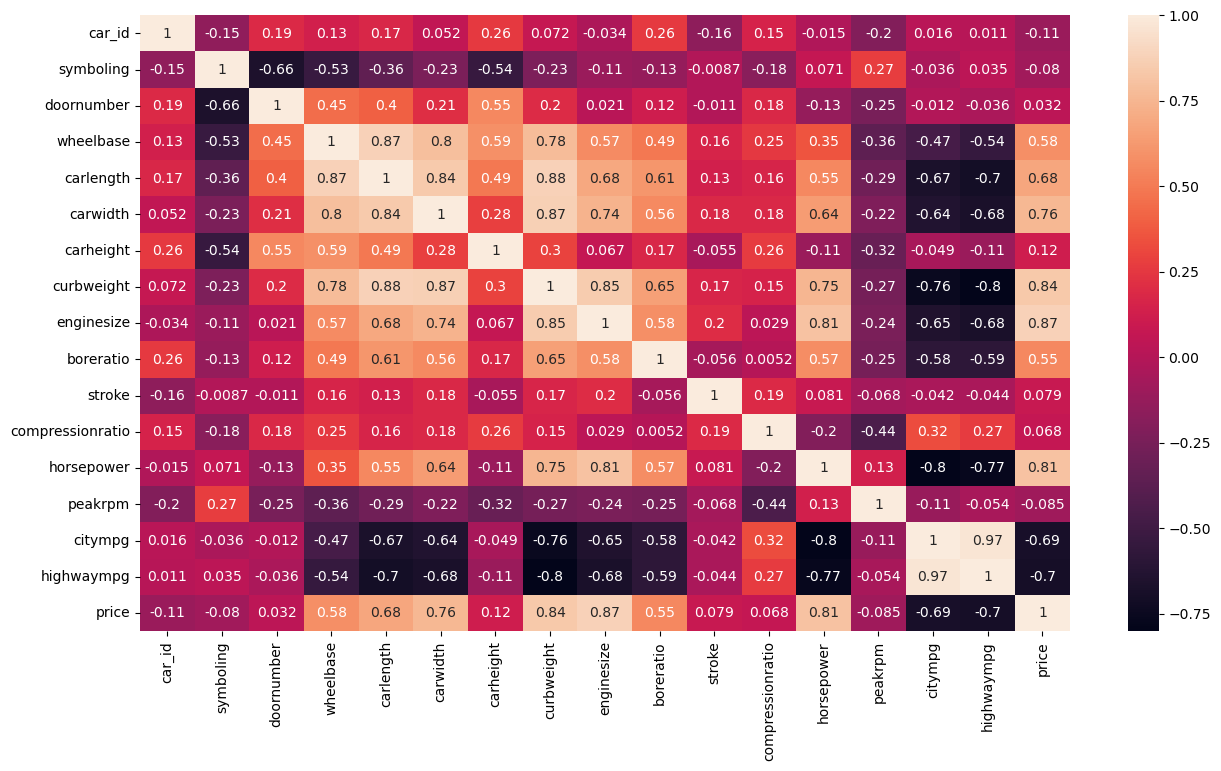

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr() , annot=True)

In [17]:
# to solve multicoleniarity problem
def remove_colleniarity(data_frame=None, threshold=None):
    correlation_data=data_frame.drop(columns='price').corr().abs().unstack().reset_index()
    correlation_data.columns=['Feature1','Feature2','Correlation']
    correlation_data=correlation_data.loc[correlation_data.Feature1 != correlation_data.Feature2]
    correlation_data.sort_values(by='Correlation' , ascending=False , inplace=True)
    correlation_data.reset_index(inplace=True)
    multicorreniarity=correlation_data.loc[correlation_data.Correlation >=threshold , 'Feature1'].unique().tolist()
    data_frame.drop(columns=multicorreniarity , inplace=True) 
    return data_frame,multicorreniarity

In [18]:
remove_colleniarity(data_frame=data,threshold=0.65)

(     car_id                   carname fueltype aspiration      carbody  \
 0       1.0        alfa-romero giulia      gas        std  convertible   
 1       2.0       alfa-romero stelvio      gas        std  convertible   
 2       3.0  alfa-romero Quadrifoglio      gas        std    hatchback   
 3       4.0               audi 100 ls      gas        std        sedan   
 4       5.0                audi 100ls      gas        std        sedan   
 ..      ...                       ...      ...        ...          ...   
 200   201.0           volvo 145e (sw)      gas        std        sedan   
 201   202.0               volvo 144ea      gas      turbo        sedan   
 202   203.0               volvo 244dl      gas        std        sedan   
 203   204.0                 volvo 246   diesel      turbo        sedan   
 204   205.0               volvo 264gl      gas      turbo        sedan   
 
     drivewheel enginelocation  carheight enginetype cylindernumber fuelsystem  \
 0          rwd 

In [19]:
data.head()

,car_id,carname,fueltype,aspiration,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price
0,1.0,alfa-romero giulia,gas,std,convertible,rwd,front,48.8,dohc,four,mpfi,3.47,2.68,9.0,5000.0,13495.0
1,2.0,alfa-romero stelvio,gas,std,convertible,rwd,front,48.8,dohc,four,mpfi,3.47,2.68,9.0,5000.0,16500.0
2,3.0,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,52.4,ohcv,six,mpfi,2.68,3.47,9.0,5000.0,16500.0
3,4.0,audi 100 ls,gas,std,sedan,fwd,front,54.3,ohc,four,mpfi,3.19,3.40,10.0,5500.0,13950.0
4,5.0,audi 100ls,gas,std,sedan,4wd,front,54.3,ohc,five,mpfi,3.19,3.40,8.0,5500.0,17450.0


In [20]:
data.car_id=data.car_id.astype(int)
data.head()

,car_id,carname,fueltype,aspiration,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price
0,1,alfa-romero giulia,gas,std,convertible,rwd,front,48.8,dohc,four,mpfi,3.47,2.68,9.0,5000.0,13495.0
1,2,alfa-romero stelvio,gas,std,convertible,rwd,front,48.8,dohc,four,mpfi,3.47,2.68,9.0,5000.0,16500.0
2,3,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,52.4,ohcv,six,mpfi,2.68,3.47,9.0,5000.0,16500.0
3,4,audi 100 ls,gas,std,sedan,fwd,front,54.3,ohc,four,mpfi,3.19,3.40,10.0,5500.0,13950.0
4,5,audi 100ls,gas,std,sedan,4wd,front,54.3,ohc,five,mpfi,3.19,3.40,8.0,5500.0,17450.0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
object_type=data.select_dtypes(include='object').columns.tolist()

In [23]:
for i in object_type:
    data[i]=pd.factorize(data[i])[0]
data.head()

,car_id,carname,fueltype,aspiration,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,price
0,1,0,0,0,0,0,0,48.8,0,0,0,3.47,2.68,9.0,5000.0,13495.0
1,2,1,0,0,0,0,0,48.8,0,0,0,3.47,2.68,9.0,5000.0,16500.0
2,3,2,0,0,1,0,0,52.4,1,1,0,2.68,3.47,9.0,5000.0,16500.0
3,4,3,0,0,2,1,0,54.3,2,0,0,3.19,3.40,10.0,5500.0,13950.0
4,5,4,0,0,2,2,0,54.3,2,2,0,3.19,3.40,8.0,5500.0,17450.0


In [24]:
x=data.drop('price' , axis=1)
y=data['price']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
x_train.shape , x_test.shape, y_train.shape , y_test.shape

((164, 15), (41, 15), (164,), (41,))

In [27]:
model=LinearRegression().fit(x_train,y_train)

In [42]:
prediction=model.predict(x_test)

In [43]:
model.score(x_train,y_train)

0.8153929151592281

In [47]:
# mean squared error 
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,prediction))

4650.5223278320045

In [49]:
# dowload model as pickle file
import pickle
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)